In [5]:
from sklearn.datasets.samples_generator import make_blobs, make_moons, make_circles
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GMM
from scipy.spatial import distance
import sklearn.neighbors
from sklearn.neighbors import DistanceMetric
import numpy as np
import pandas as pd
import random
import math

baseSampleNum = 100
scale = 1
colors = ['red', 'blue', 'yellow']
    

In [6]:
class dataSet: 
    def __init__(self, X, labels):
        self._X = X
        self._labels = labels
        self._numFeatures = X.shape[1]
        self._numOfLabels = len(np.unique(labels))
        
    def getNumFeatures(self):
        return self._numFeatures 
    
    def getLabels(self):
        return  self._labels
    
    def getData(self):
        return self._X

In [7]:
def generateUniformSamples(featuresNumber, N):
    listDim = []
    for i in range(featuresNumber):
        x = np.random.uniform(0, 1, N)
        listDim.append(x) 
    X = np.array(list(zip(listDim)))
    return X[:, 0, :].T

def plotData(data, labels):
     colors = ['red', 'blue', 'yellow']
     X = data
     uniqueLabels = np.unique(labels).tolist()
     ax = plt.subplot("111") 
     for labelI in uniqueLabels:
        for ind in range(len(X)):
            if labels[ind] == labelI:
                sample = X[ind,:]
                ax.scatter(sample[0],sample[1],color=colors[labelI]) 
     plt.show()




# Are there any real patterns in the data?
## Test the hypothesis of the existence of clusters in the data against a uniformly homogeneously distributed dataset


In [19]:
def getHopkinsMetric(dataSet, n):
    """
    Test the hypothesis of the existence of clusters in the data against a
    uniformly homogeneously distributed dataset
    If points are uniformly distributed then the value of H should be around 0.5 (because the
    densities in the generated point’s areas should be similar to those of the sampled point’s
    areas)"""
    fn = dataSet.getNumFeatures()
    X = dataSet.getData()
    X2 = generateUniformSamples(fn, n)  
    
    distance_metric = DistanceMetric.get_metric('euclidean')
    
#   Calculate an array with all the euclidean distances between the points
    dist_X = distance_metric.pairwise(X)
    
    s_d = 0
    for i in xrange(n):
        list_i = dist_X[i,:].tolist()
#       Remove self distance which is zero and would harm the result
        list_except_col_i = [list_i[ind] for ind in range(len(list_i)) if ind !=i ]
        min_val = np.min(list_except_col_i)
        s_d += min_val
        
    dist_X2_X0 = distance_metric.pairwise(X, X2)
    s_g = 0
    for i in range(n):
        list_i = dist_X2_X0[i,:].tolist()
        min_val = np.min(list_i)
        s_g += min_val
    
    # calc HopkinsMetric 
    hopkins = ((s_d)/(s_g + s_d)) 
    return hopkins

# How “good” are the clusters we found?
## Silhouette Internal Index

In [46]:
# Help function 
def calcAiBi(i, X, predicted_labels):
    """Calculate ai = average distance of i to the points in its cluster
    Calculate bi = min (average distance of i to points in another cluster)"""

    n = len(predicted_labels)
    distPerLabel = {}
    averageDistPerLabel = {}
    k = np.unique(predicted_labels)
    for label in k:
        distPerLabel[label] = []
        
#   i is the index of the point from which the averages will be calculated
    x_i = X[i,:]
    
#   Get label for the point itself
    label_i = predicted_labels[i]
    dist = DistanceMetric.get_metric('euclidean')
    dist_x_i = dist.pairwise([x_i],X)    
    for ind_point in range(n):
#       don't consider case in which distance is 
        if ind_point == i: continue
        label_per_point =  predicted_labels[ind_point]
        distPerLabel[label_per_point].append(dist_x_i[0, ind_point])
        
    for label in k:
        averageDistPerLabel[label] = np.average(distPerLabel[label])

    a_i = averageDistPerLabel[label_i]
#   del averageDistPerLabel that the intent is to remove the variable from scope
    del averageDistPerLabel[label_i]
    b_i = np.min(list(averageDistPerLabel.values()))
    print a_i, b_i
    return (a_i, b_i)    


def getSilhouetteIndexKmeans(ds, n, k):
    """Results are between -1 and 1, with results closer to 1 indicating a better
    clustering pattern"""
    X                = ds.getData()
    kmeans           = KMeans(n_clusters=k, random_state=0).fit(X)
    predicted_labels = kmeans.labels_
    
    s_all = 0
    for i in range(n):

        a_i, b_i = calcAiBi(i, X, predicted_labels) 
        s_all += (b_i - a_i)/max(a_i, b_i)
    s = s_all/n    
    return s


Hopkings Metric: 0.0605861593805
Silhouette Index: 1.52022494141 9.14282087138
1.93135211183 7.48264664384
1.73769089976 10.6883167302
1.49829226983 7.85745344306
1.89001686237 9.62059129684
2.42026319552 11.2196819019
1.62784891658 11.8425915906
1.21676313055 8.71679934752
1.25677733526 8.82020271863
1.76801881891 8.32301690699
2.57732328851 7.30915321454
1.76434263956 8.00711188947
2.32195288171 9.9966565943
2.34523584064 12.9581609199
1.77958954662 9.72704665614
1.95723581601 7.54294274211
2.40345188257 9.28257098386
1.72168563886 10.0631164966
1.58709718476 11.8316336865
1.49737611512 9.0181617266
1.49907865044 11.7843596391
1.52816898994 11.080774585
1.75637264596 9.61102978325
1.42083043883 8.07503106139
1.80756701976 8.5172670255
1.34387104343 8.44741424496
2.88804546693 9.70640437344
2.61072017386 10.1524857663
1.35353571876 8.73359413045
2.18799814895 12.9997141737
1.61696320168 8.78253953529
1.84561079249 9.57684725151
1.91460907411 10.9025201188
1.92957816546 10.1320332645
2

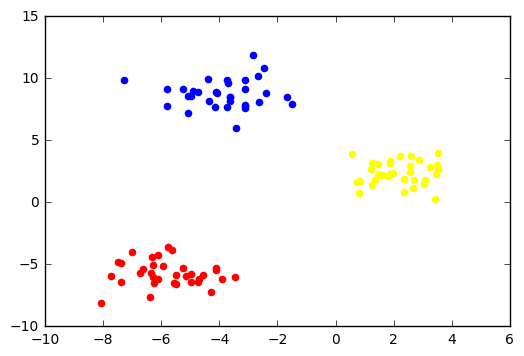

In [47]:
K = 3
N = 100
X, labels = make_blobs(n_samples = N) # Generate isotropic Gaussian blobs for clustering.
ds                 = dataSet(X, labels)

# Getting lower value for Hopkings means that at least there are some pattern in the data
print "Hopkings Metric:", getHopkinsMetric(ds,N)
print "Silhouette Index:", getSilhouetteIndexKmeans(ds, N, K)

plotData(X, labels)